### CitiBike Economic Data Analysis

Import all necessary packages.

In [1]:
# Dataframes and numerical
import pandas as pd
import numpy as np

# Increase pandas default display 
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

# Suppress scientific notation of data in pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Graphing
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from matplotlib.legend import Legend
from matplotlib.colors import TwoSlopeNorm
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

**Membership Trends**

Load **.csv** file of CitiBike membership trends from May 2021 through April 2022 into **pandas** dataframe.

In [2]:
CB_Member = pd.read_csv('data/202105-202204_citibike_memberships.csv', usecols = range(0,7))

Understand the structure of the dataframe.

In [3]:
CB_Member

,year,month,annual_passes,single_trip_passes,single_day_passes,three_day_passes,active_annual_members
0,2021,5,23026,373321,29356,0,151580
1,2021,6,24345,900087,33326,0,149024
2,2021,7,22211,912666,34941,0,148814
3,2021,8,36972,898124,27302,0,149404
4,2021,9,24716,945380,26909,0,150162
5,2021,10,13570,776595,18351,0,149006
6,2021,11,7029,456486,10990,0,147910
7,2021,12,5479,339579,8631,0,147227
8,2022,1,3675,145858,2477,0,145614
9,2022,2,3040,190920,4531,0,144981


In [4]:
CB_Member.shape

(12, 7)

In [5]:
CB_Member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   year                   12 non-null     int64
 1   month                  12 non-null     int64
 2   annual_passes          12 non-null     int64
 3   single_trip_passes     12 non-null     int64
 4   single_day_passes      12 non-null     int64
 5   three_day_passes       12 non-null     int64
 6   active_annual_members  12 non-null     int64
dtypes: int64(7)
memory usage: 800.0 bytes


In [6]:
CB_Member.dtypes

year                     int64
month                    int64
annual_passes            int64
single_trip_passes       int64
single_day_passes        int64
three_day_passes         int64
active_annual_members    int64
dtype: object

Plot the active annual membership trends throughout the year.

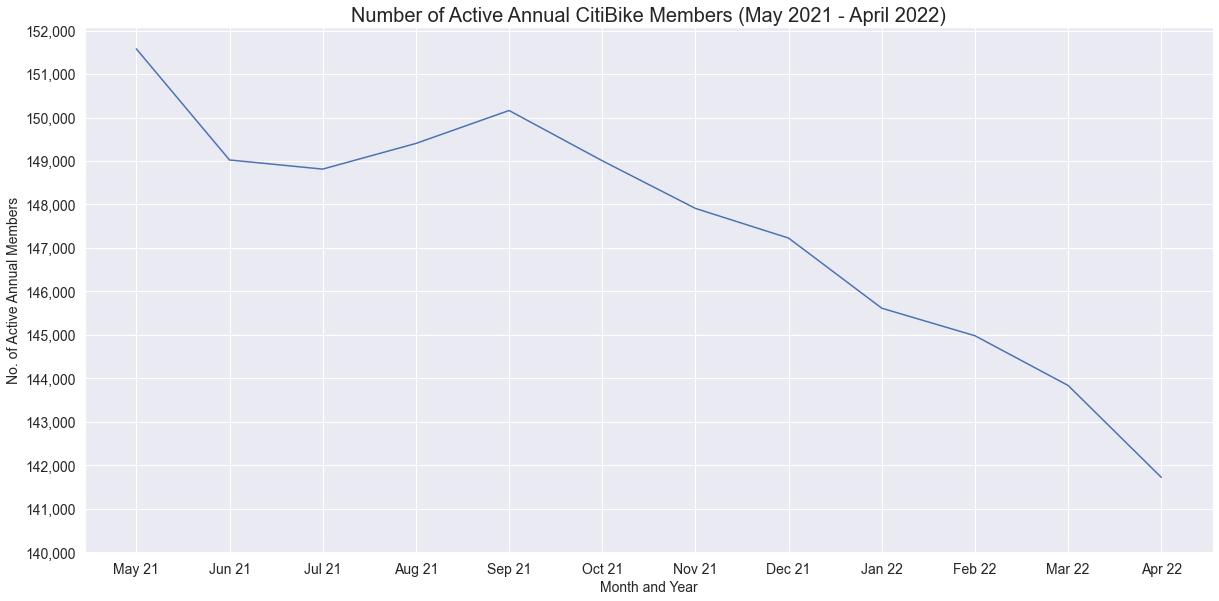

In [43]:
# Creating seaborn lineplot
plt.figure(figsize=(18,9))
g = sns.lineplot(x = CB_Member.index,
                 y = 'active_annual_members',
                 data = CB_Member)

# Plot formatting
g.set_yticks(list(range(140000,153000,1000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticks(list(range(0,len(CB_Member))))
g.set_xticklabels(['May 21','Jun 21','Jul 21','Aug 21','Sep 21','Oct 21',
                   'Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22'])
plt.title('Number of Active Annual CitiBike Members (May 2021 - April 2022)', fontsize=20)
plt.xlabel('Month and Year', fontsize=14)
plt.ylabel('No. of Active Annual Members', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Plot the casual membership trends throughout the year.

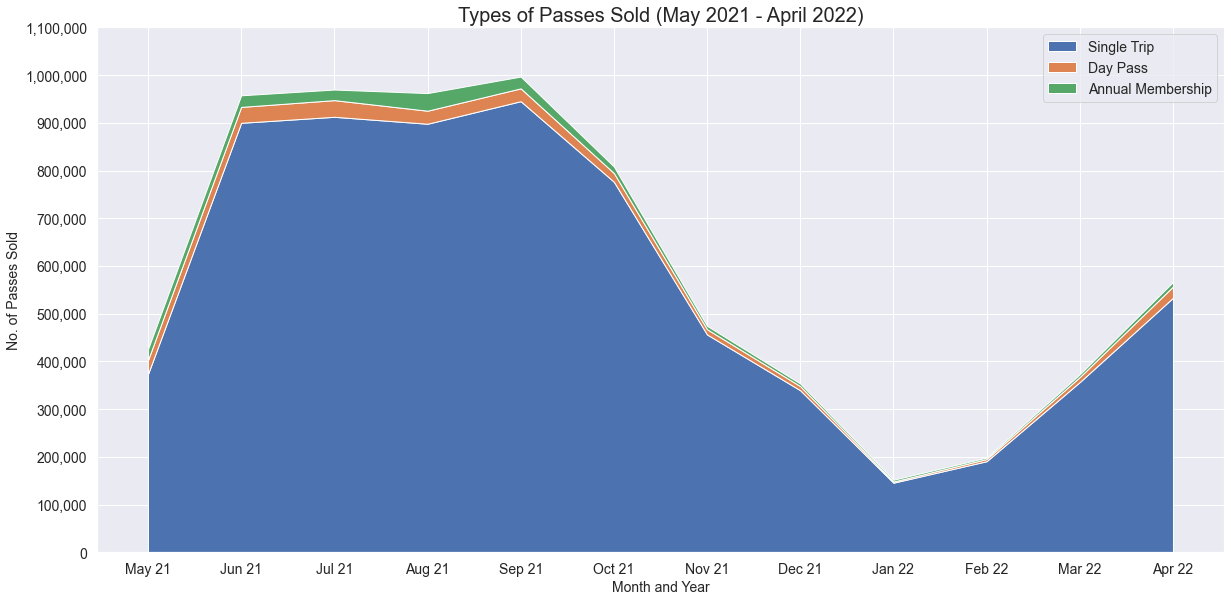

In [41]:
# Creating seaborn plot area
fig, ax = plt.subplots(figsize=(18,9))
#ax.figure(figsize=(18,9))

# Setting seaborn style
sns.set_theme()
 
# Data
x = CB_Member.index
y = [CB_Member.single_trip_passes, CB_Member.single_day_passes, CB_Member.annual_passes]

# Plot
ax.stackplot(x, y, labels=['Single Trip','Day Pass','Annual Membership'])
ax.legend(loc='upper right')

# Plot formatting
ax.set_yticks(list(range(0,1200000,100000)))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
ax.set_xticks(list(range(0,len(CB_Member))))
ax.set_xticklabels(['May 21','Jun 21','Jul 21','Aug 21','Sep 21','Oct 21',
                   'Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22'])
ax.legend(prop={'size': 14})
ax.set_title('Types of Passes Sold (May 2021 - April 2022)', fontsize=20)
ax.set_xlabel('Month and Year', fontsize=14)
ax.set_ylabel('No. of Passes Sold', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Revenue Trends**

Load **.csv** file of CitiBike revenue trends from May 2021 through April 2022 into **pandas** dataframe.

In [10]:
CB_Revenue = pd.read_csv('data/202105-202204_citibike_revenue.csv', usecols = range(0,13))

Understand the structure of the dataframe.

In [11]:
CB_Revenue

,year,month,annual_membership,monthly_membership,casual_membership,annual_overage,monthly_overage,casual_overage,other_revenue,refunds_and_discounts,tax,sponsorship,lyft_pink
0,2021,5,"4,902,269.44","1,692.76","2,785,180.91","167,479.43","8,157.84","1,106,465.51","1,837,892.79","-397,104.21","747,744.42","1,803,274.00",0
1,2021,6,"5,572,995.37",173,"3,522,300.21","143,562.43","4,536.08","1,388,340.27","1,688,925.27","-456,607.44","833,245.85","22,750.00",0
2,2021,7,"4,989,399.32",39,"3,614,197.59","217,799.46","3,194.88","1,401,704.26","1,719,279.49","-2,147,066.94","827,141.06","244,554.50",0
3,2021,8,"5,040,661.50",46,"3,437,864.67","212,488.52","1,959.39","1,279,440.52","1,402,339.21","-2,143,845.28","754,040.46","1,792,379.69",0
4,2021,9,"5,086,640.16",59,"3,602,847.67","219,640.68","85,310.28","1,223,033.52","1,233,903.77","-2,249,709.35","776,652.39","404,788.67",0
5,2021,10,"3,026,653.19",19,"2,858,712.94","279,114.27","2,307.48","1,066,538.61","1,099,961.00","-1,678,890.04","601,137.20","258,380.55",0
6,2021,11,"1,368,152.87",5,"1,773,895.43","196,630.68","1,533.84","635,186.49","1,055,277.10","-930,837.10","379,833.80","1,834,254.00",0
7,2021,12,"1,167,163.97",5,"1,245,167.91","245,783.04","2,591.76","462,091.22","954,201.39","-793,063.45","306,356.93","128,399.68",0
8,2022,1,"821,736.09",10,"527,117.35","490,477.78","3,481.56","355,731.98","541,235.72","-1,048,538.65","208,709.91","2,007,998.41",0
9,2022,2,"845,718.75",0,"782,672.58","122,477.24",483.78,"297,475.76","813,456.05","-414,427.19","223,236.02","457,381.70","81,154.00"


In [12]:
CB_Revenue.shape

(12, 13)

In [13]:
CB_Revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   12 non-null     int64 
 1   month                  12 non-null     int64 
 2   annual_membership      12 non-null     object
 3   monthly_membership     12 non-null     object
 4   casual_membership      12 non-null     object
 5   annual_overage         12 non-null     object
 6   monthly_overage        12 non-null     object
 7   casual_overage         12 non-null     object
 8   other_revenue          12 non-null     object
 9   refunds_and_discounts  12 non-null     object
 10  tax                    12 non-null     object
 11  sponsorship            12 non-null     object
 12  lyft_pink              12 non-null     object
dtypes: int64(2), object(11)
memory usage: 1.3+ KB


In [14]:
CB_Revenue.dtypes

year                      int64
month                     int64
annual_membership        object
monthly_membership       object
casual_membership        object
annual_overage           object
monthly_overage          object
casual_overage           object
other_revenue            object
refunds_and_discounts    object
tax                      object
sponsorship              object
lyft_pink                object
dtype: object

Convert all other columns to float values in order for them to compute when creating the graph.

In [15]:
rev_cols_ex = ['year','month']
rev_cols = list(filter(lambda x: x not in rev_cols_ex, CB_Revenue.columns.tolist()))

In [16]:
CB_Revenue[rev_cols] = pd.DataFrame(map(lambda x: CB_Revenue[x].str.replace(',','').astype(float), rev_cols)).transpose()

In [17]:
CB_Revenue

,year,month,annual_membership,monthly_membership,casual_membership,annual_overage,monthly_overage,casual_overage,other_revenue,refunds_and_discounts,tax,sponsorship,lyft_pink
0,2021,5,4902269.44,1692.76,2785180.91,167479.43,8157.84,1106465.51,1837892.79,-397104.21,747744.42,1803274.00,0.00
1,2021,6,5572995.37,173.00,3522300.21,143562.43,4536.08,1388340.27,1688925.27,-456607.44,833245.85,22750.00,0.00
2,2021,7,4989399.32,39.00,3614197.59,217799.46,3194.88,1401704.26,1719279.49,-2147066.94,827141.06,244554.50,0.00
3,2021,8,5040661.50,46.00,3437864.67,212488.52,1959.39,1279440.52,1402339.21,-2143845.28,754040.46,1792379.69,0.00
4,2021,9,5086640.16,59.00,3602847.67,219640.68,85310.28,1223033.52,1233903.77,-2249709.35,776652.39,404788.67,0.00
5,2021,10,3026653.19,19.00,2858712.94,279114.27,2307.48,1066538.61,1099961.00,-1678890.04,601137.20,258380.55,0.00
6,2021,11,1368152.87,5.00,1773895.43,196630.68,1533.84,635186.49,1055277.10,-930837.10,379833.80,1834254.00,0.00
7,2021,12,1167163.97,5.00,1245167.91,245783.04,2591.76,462091.22,954201.39,-793063.45,306356.93,128399.68,0.00
8,2022,1,821736.09,10.00,527117.35,490477.78,3481.56,355731.98,541235.72,-1048538.65,208709.91,2007998.41,0.00
9,2022,2,845718.75,0.00,782672.58,122477.24,483.78,297475.76,813456.05,-414427.19,223236.02,457381.70,81154.00


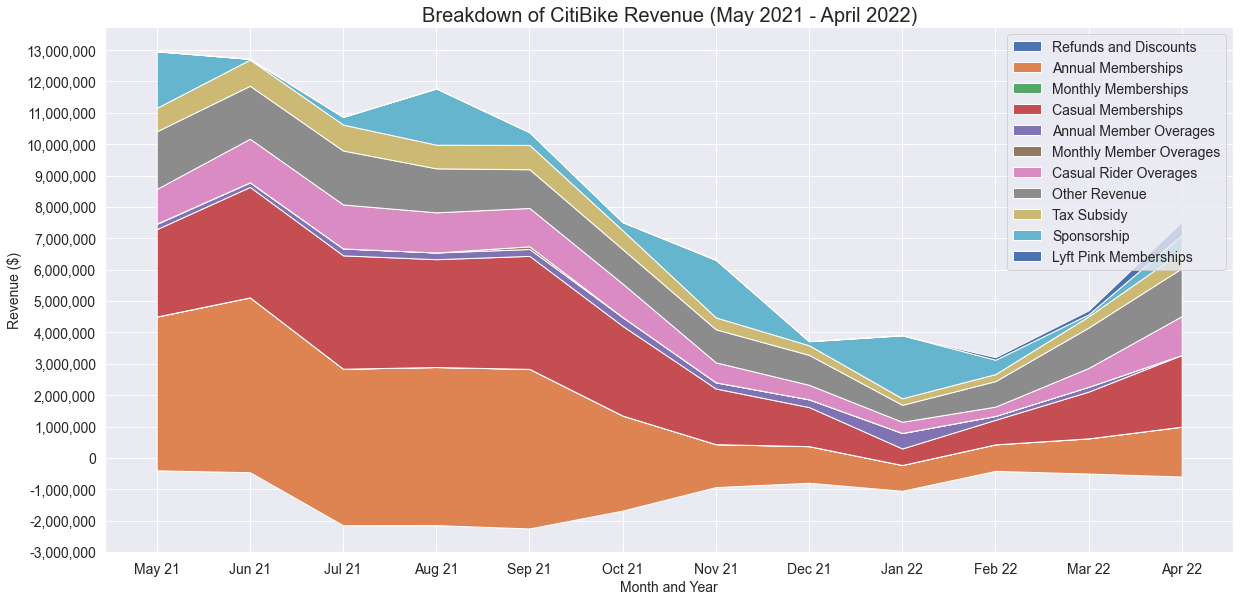

In [27]:
# Creating seaborn plot area
fig, ax = plt.subplots(figsize=(18,9))
#ax.figure(figsize=(18,9))

# Setting seaborn style
sns.set_theme()
 
# Data
x = CB_Revenue.index
y = [CB_Revenue.refunds_and_discounts,
     CB_Revenue.annual_membership,
     CB_Revenue.monthly_membership,
     CB_Revenue.casual_membership,
     CB_Revenue.annual_overage,
     CB_Revenue.monthly_overage,
     CB_Revenue.casual_overage,
     CB_Revenue.other_revenue,
     CB_Revenue.tax,
     CB_Revenue.sponsorship,
     CB_Revenue.lyft_pink]

# Plot
ax.stackplot(x, y, labels=['Refunds and Discounts',
                           'Annual Memberships',
                           'Monthly Memberships',
                           'Casual Memberships',
                           'Annual Member Overages',
                           'Monthly Member Overages',
                           'Casual Rider Overages',
                           'Other Revenue',
                           'Tax Subsidy',
                           'Sponsorship',
                           'Lyft Pink Memberships'],
             baseline='zero')
ax.legend(loc='upper right')

# Plot formatting
ax.set_yticks(list(range(-3000000,14000000,1000000)))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
ax.set_xticks(list(range(0,len(CB_Revenue))))
ax.set_xticklabels(['May 21','Jun 21','Jul 21','Aug 21','Sep 21','Oct 21',
                   'Nov 21','Dec 21','Jan 22','Feb 22','Mar 22','Apr 22'])
ax.legend(prop={'size': 14})
ax.set_title('Breakdown of CitiBike Revenue (May 2021 - April 2022)', fontsize=20)
ax.set_xlabel('Month and Year', fontsize=14)
ax.set_ylabel('Revenue ($)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()